## Load the dataset

In [7]:
import pandas as pd

In [8]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url)
df.head(6)

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


In [9]:
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
df = pd.read_csv(url, names=column_names, sep=' ', comment='\t')
df.head(5)

ParserError: Error tokenizing data. C error: Expected 30 fields in line 7, saw 31


In [10]:
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin']
df = pd.read_csv(url, names=column_names, sep=' ', comment='\t', skipinitialspace=True)
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [126]:
import matplotlib.pyplot as plt

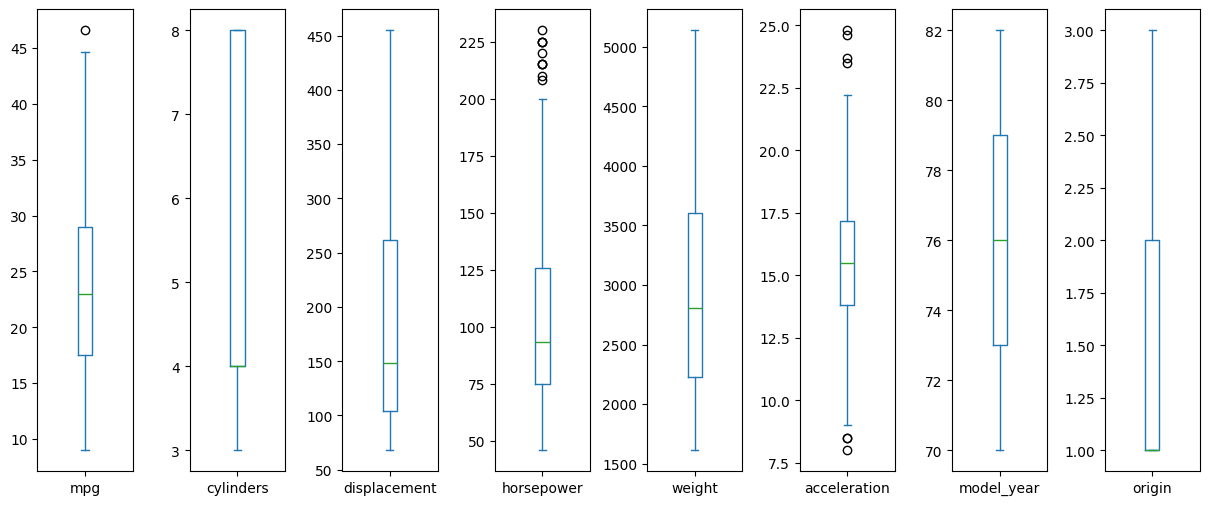

In [127]:
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
 
# increase spacing between subplots
plt.subplots_adjust(wspace=0.6) 
plt.show()

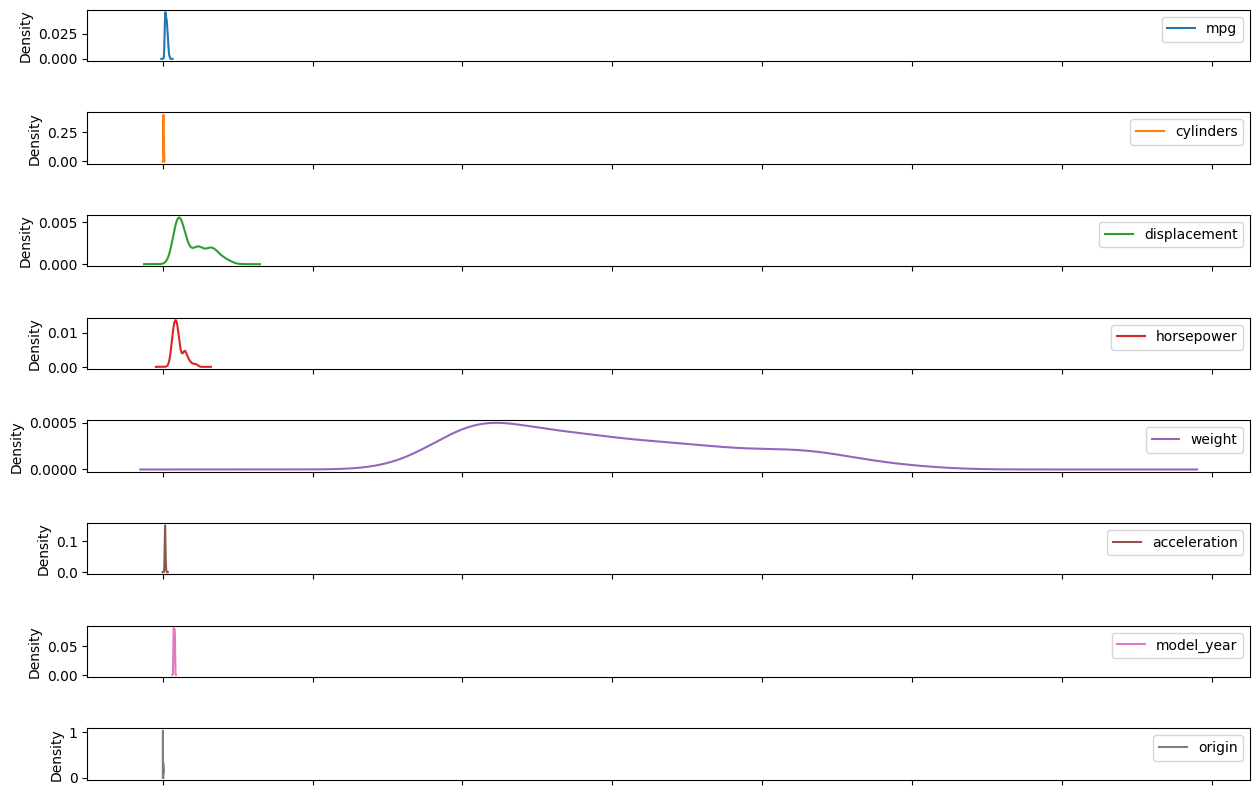

In [134]:
df.plot(
    kind='kde', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 10)
)
 
# increase spacing between subplots
plt.subplots_adjust(hspace=1) 
plt.xticks(visible=False)
plt.show()

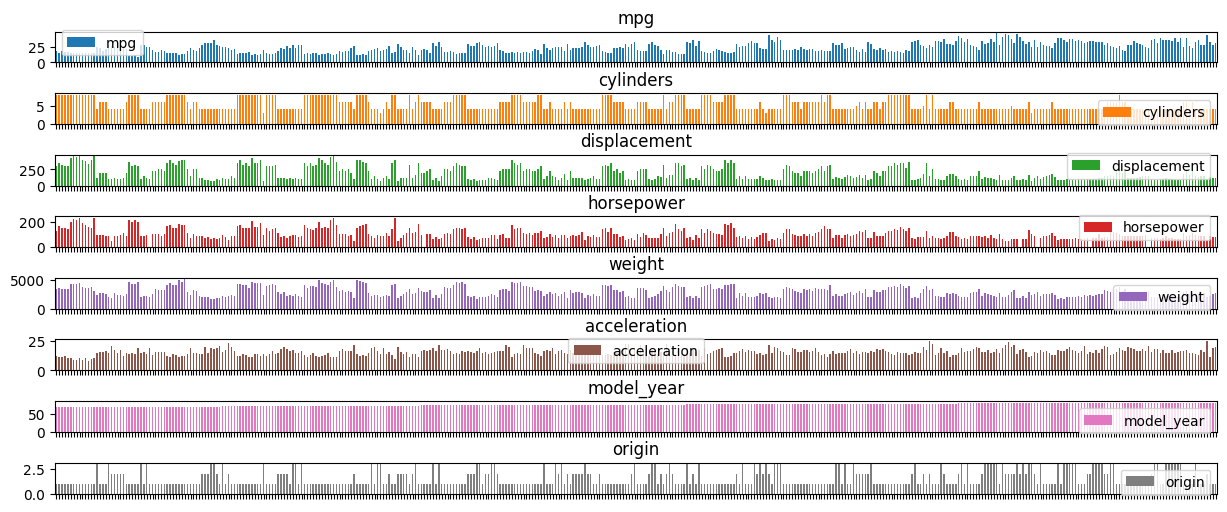

In [125]:
df.plot(
    kind='bar', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
 
# increase spacing between subplots
plt.subplots_adjust(hspace=1) 
plt.xticks(visible=False)
plt.show()

In [12]:
set(df.iloc[:,-1])

{1, 2, 3}

## Transform the dataset into a Tensor dataset

In [13]:
import tensorflow as tf

2024-03-05 23:56:51.388899: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 23:56:51.388957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 23:56:51.411240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 23:56:51.465503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 23:56:52.581405: W tensorflow/compiler/tf2

In [14]:
df_tf = tf.convert_to_tensor(df)

2024-03-05 23:56:55.001366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-05 23:56:55.127736: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-05 23:56:55.128012: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [15]:
dt_tf = tf.convert_to_tensor(df, dtype=tf.float32)

ValueError: could not convert string to float: '?'

### Solving dataset data type errors

In [16]:
df = pd.read_csv(url, names=column_names, sep=' ', comment='\t', skipinitialspace=True, na_values='?')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [18]:
drop_df = df.dropna()

# Identity which columns the nan values are located (horsepower)
horsepower_avg = df['horsepower'].mean()

avg_df = df.fillna(horsepower_avg)
zero_df = df.fillna(0)

In [19]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [20]:
avg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [21]:
zero_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


### Final result

It is imperative that the tensor is converted to float32 for the tf.concat to work properly.

In [84]:
dataframe_tf = tf.convert_to_tensor(avg_df, dtype=tf.float32)
dataframe_tf

<tf.Tensor: shape=(398, 8), dtype=float32, numpy=
array([[ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ],
       [ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       ...,
       [ 32. ,   4. , 135. , ...,  11.6,  82. ,   1. ],
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ]], dtype=float32)>

## Preparing the Tensor

In [85]:
test1 = tf.constant([[0,1,2,3,4,5,6,7,8,9],[9,8,7,6,5,4,3,2,1,0]], dtype=tf.float32)
tf.split(test1, num_or_size_splits=2, axis=1)

[<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
 array([[0., 1., 2., 3., 4.],
        [9., 8., 7., 6., 5.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 5), dtype=float32, numpy=
 array([[5., 6., 7., 8., 9.],
        [4., 3., 2., 1., 0.]], dtype=float32)>]

In [93]:
test_dim = int(dataframe_tf.shape[0] * .3)

dataframe_tf = tf.random.shuffle(dataframe_tf, seed=3)
test_dataframe_tf , train_dataframe_tf = dataframe_tf[:test_dim] , dataframe_tf[test_dim:]

X_train, y_train = train_dataframe_tf[:,1:] , train_dataframe_tf[:,0]
X_test, y_test = test_dataframe_tf[:,1:] , test_dataframe_tf[:,0]

### Perform feature engineering to represent categorical variables as numerical features.

A one hot encoding is a representation of categorical variables as binary vectors.

In [88]:
test2 = tf.constant([0.0,1.0,2.0,3.0,-1.0])
test2 = tf.cast(test2, dtype=tf.int32)
one_hot = tf.one_hot(test2, depth=3)
one_hot

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [89]:
concat0 = tf.concat([[test2 * 4],[test2]], axis=0)
print(concat0)
concat1 = tf.concat([[test2 * 4],[test2]], axis=1)
print(concat1)

tf.Tensor(
[[ 0  4  8 12 -4]
 [ 0  1  2  3 -1]], shape=(2, 5), dtype=int32)
tf.Tensor([[ 0  4  8 12 -4  0  1  2  3 -1]], shape=(1, 10), dtype=int32)


In [94]:
def onehot_origin(x):
    origin = tf.cast(x[:,-1] , tf.int32)
     # Use `origin - 1` to account for 1-indexed feature
    origin_onehot = tf.one_hot(origin-1,len(set(origin.numpy())))
    x_onehot = tf.concat([x[:, :-1], origin_onehot], axis=1)
    return x_onehot

In [95]:
X_train_onehot, X_test_onehot = onehot_origin(X_train), onehot_origin(X_test)

In [100]:
import matplotlib.pyplot as plt
import numpy as np

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [144]:
adapt_data = np.array([[0., 7., 4.],
                       [2., 9., 6.],
                       [0., 7., 4.],
                       [2., 9., 6.]], dtype='float32')
layer = tf.keras.utils.normalize(adapt_data,axis=0)
layer

array([[0.        , 0.43412158, 0.39223227],
       [0.70710677, 0.5581563 , 0.5883484 ],
       [0.        , 0.43412158, 0.39223227],
       [0.70710677, 0.5581563 , 0.5883484 ]], dtype=float32)